# Loading Python packages


The packages have pre-written code to complete a wide range of tasks.

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost
from xgboost import XGBClassifier, DMatrix

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load iris and cardiovascular datasets

In [2]:
iris_data = datasets.load_iris()
iris_data_X = iris_data['data']
iris_data_Y = iris_data['target']
iris_xtrain, iris_xtest, iris_ytrain, iris_ytest = train_test_split(iris_data_X, iris_data_Y, test_size=0.3, random_state=123)
print('Iris train size and num features: ', iris_xtrain.shape)
print('Iris test size and num features: ', iris_xtest.shape)

cardio_data = pd.read_csv('../Filtered_cardiovascular_disease.csv')
cardio_data_X = cardio_data.iloc[:, :-1].values
cardio_data_Y = LabelEncoder().fit_transform(cardio_data['CARDIO_DISEASE'].values)
cardio_xtrain, cardio_xtest, cardio_ytrain, cardio_ytest = train_test_split(cardio_data_X, cardio_data_Y, test_size=0.2, random_state=123)
print('Cardio train size and num features: ', cardio_xtrain.shape)
print('Cardio test size and num features: ', cardio_xtest.shape)

Iris train size and num features:  (105, 4)
Iris test size and num features:  (45, 4)
Cardio train size and num features:  (54605, 11)
Cardio test size and num features:  (13652, 11)


# Gradient Boosted Trees

### XGBoost classification model for the iris dataset

Train and evaluate the performance of an XGBClassifier model on the iris
dataset using the default model parameters.

In [3]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(iris_xtrain, iris_ytrain)
train_acc = xgb_model.score(iris_xtrain, iris_ytrain)
print('XGBClassifier training complete!')
print('XGBClassifier train set accuracy: ', train_acc)
test_acc = xgb_model.score(iris_xtest, iris_ytest)
print('XGBClassifier test set accuracy: ', test_acc)

XGBClassifier training complete!
XGBClassifier train set accuracy:  1.0
XGBClassifier test set accuracy:  0.9333333333333333


### Use "grid search" to find the best set of paramters for the model from a set of parameters.

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_params = {
    'booster':['gbtree', 'dart'],
    'learning_rate':[0.1, 0.2, 0.3],
    'max_depth':[3, 6, 9],
    'gamma':[0, 0.1]
}

grid = GridSearchCV(xgb_model, model_params, cv=5, verbose=1)
grid.fit(iris_xtrain, iris_ytrain)
train_acc = grid.score(iris_xtrain, iris_ytrain)
print('XGBClassifier training complete!')
print('XGBClassifier train set accuracy: ', train_acc)
test_acc = grid.score(iris_xtest, iris_ytest)
print('XGBClassifier test set accuracy: ', test_acc)

## Exercise 1.

Train an XGBoost classifier on the cardiovascular dataset.

In [5]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(cardio_xtrain, cardio_ytrain)
train_acc = xgb_model.score(cardio_xtrain, cardio_ytrain)
print('XGBClassifier training complete!')
print('XGBClassifier train set accuracy: ', train_acc)
test_acc = xgb_model.score(cardio_xtest, cardio_ytest)
print('XGBClassifier test set accuracy: ', test_acc)

XGBClassifier training complete!
XGBClassifier train set accuracy:  0.7579159417635748
XGBClassifier test set accuracy:  0.7365221213009083


In [34]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_params = {
    'learning_rate':[0.1, 0.2, 0.3],
    'max_depth':[3, 6, 9],
    'gamma':[0, 0.1]
}

grid = GridSearchCV(xgb_model, model_params, cv=5, verbose=1)
grid.fit(cardio_xtrain, cardio_ytrain)
train_acc = grid.score(cardio_xtrain, cardio_ytrain)
print('XGBClassifier training complete!')
print('XGBClassifier train set accuracy: ', train_acc)
test_acc = grid.score(cardio_xtest, cardio_ytest)
print('XGBClassifier test set accuracy: ', test_acc)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
XGBClassifier training complete!
XGBClassifier train set accuracy:  0.739089826938925
XGBClassifier test set accuracy:  0.7407705830647524


## Feature importance

Once a model is trained, it is very beneficial to see which feautures or
variables are the most important to the model. There are various ways of doing
this, but for the purpose of this workshop, we will focus on 2 methods:

1. **Feature coverage:** Feature importance based on the number of samples in the dataset that are
   affected when a decision is made on a given feature.
2. **Shapley values:** Observing the Shapley values of a feature. This is a concept from game
   theory, and can intuitively be understood as the marginal contribution of a feature to
   the models prediction. What this essentially means is that, if the feature
   were to be taken away from the set of features the model is looking at to
   make a prediction, how much would it affect the model's prediction. 

### Feature coverage

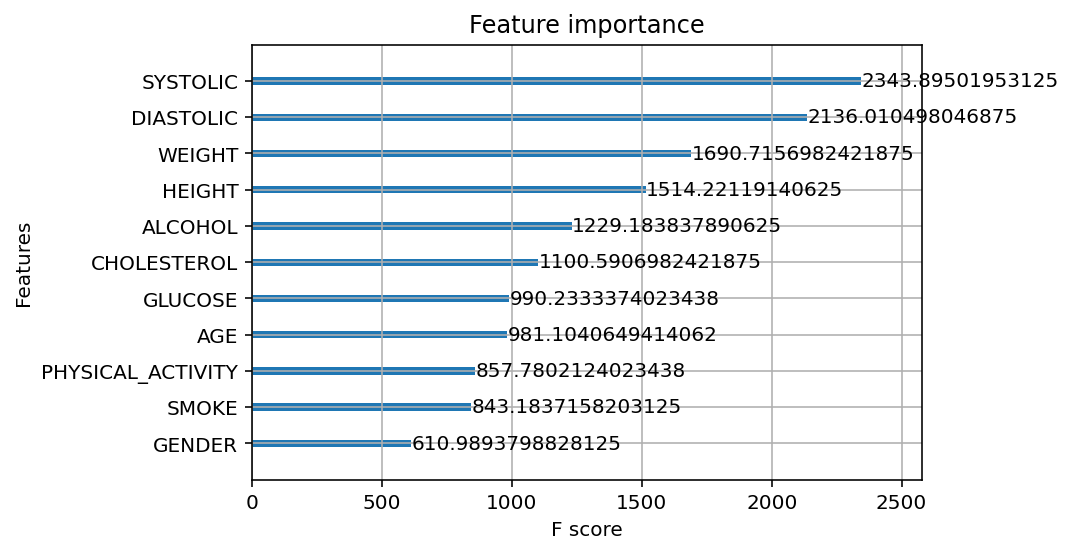

In [31]:
xgboost.plot_importance(xgb_model, importance_type='cover')
ax = plt.gca()
ax.set_yticklabels([cardio_data.columns[int(i.get_text()[1:])] for i in ax.get_yticklabels()])
plt.show()

### Shapley values

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


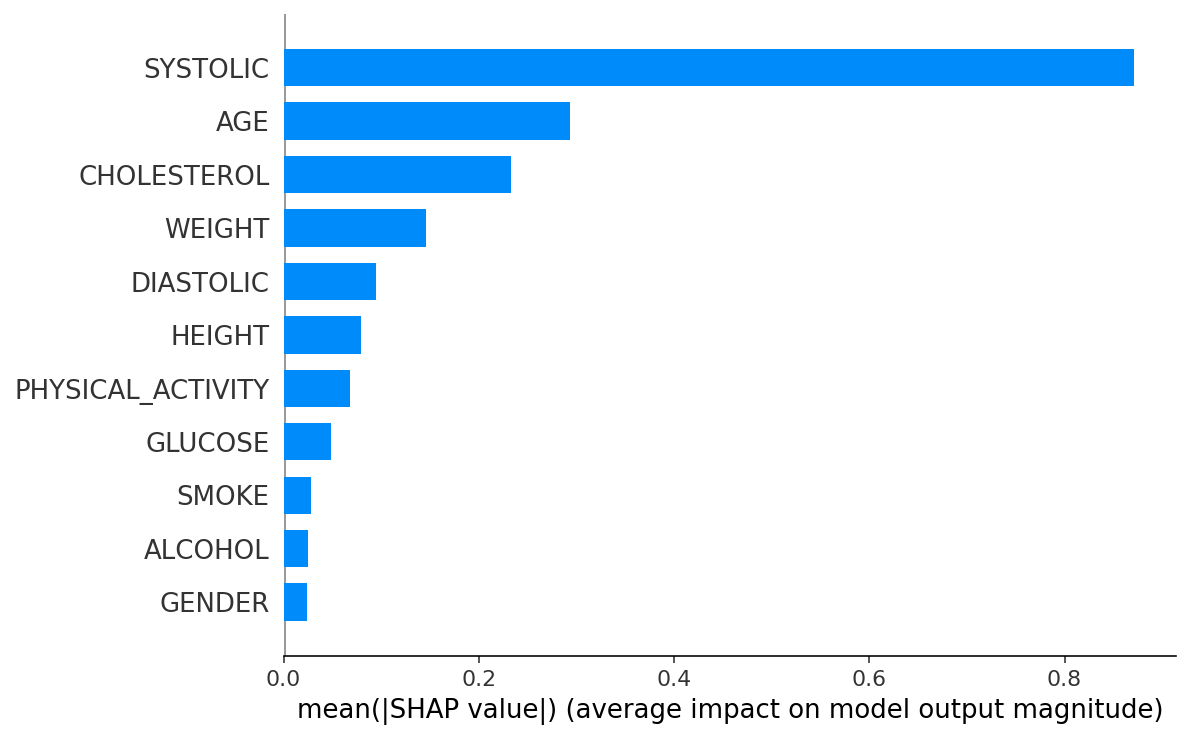

In [32]:
import shap

explainer = shap.TreeExplainer(xgb_model)
Xd = DMatrix(cardio_xtrain, label=cardio_ytrain)
shap_values = explainer.shap_values(Xd)
cardio_xtrain_df = pd.DataFrame(cardio_xtrain, columns=cardio_data.columns[:-1])
shap.summary_plot(shap_values, cardio_xtrain_df, plot_type="bar")

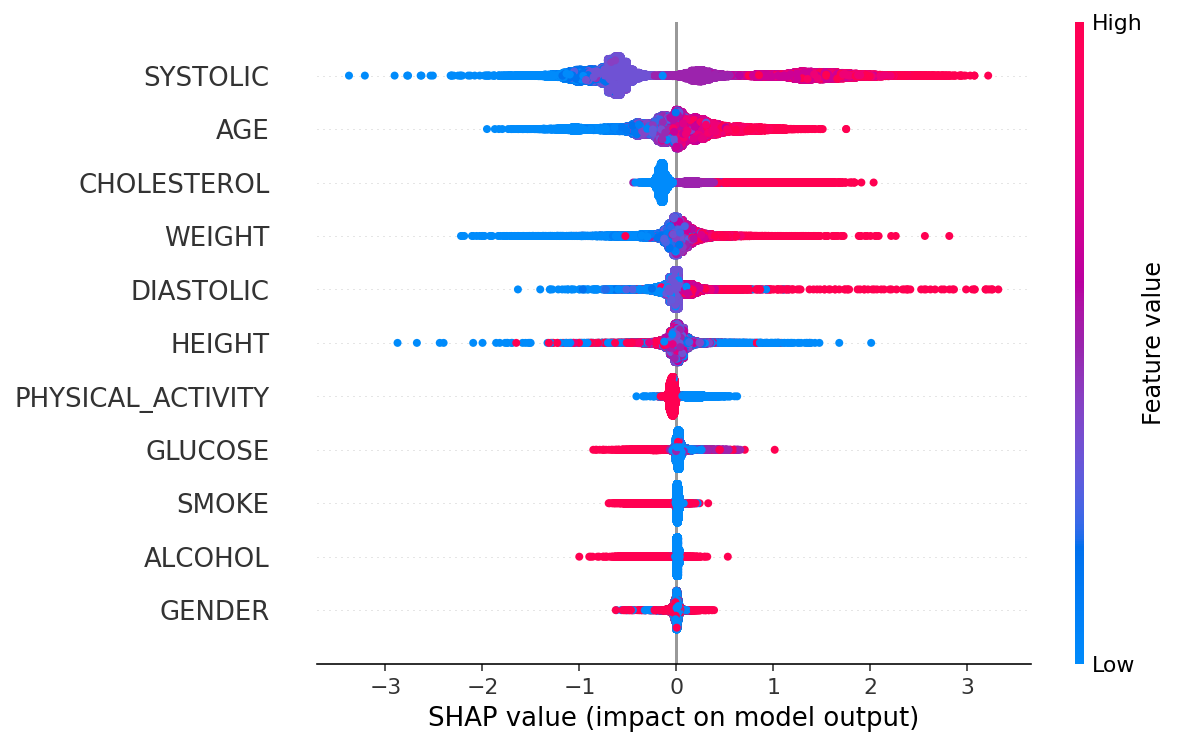

In [33]:
shap.summary_plot(shap_values, cardio_xtrain_df)